In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

pd.options.mode.chained_assignment = None

%run Functions.ipynb

In [2]:
'''
训练数据
500 stocks
3120 ticks = 13 trading days (240 ticks per day)
'''

data = pd.read_csv('data/CONTEST_DATA_MIN_SP_1.csv', header = None)
data.rename(columns={0:'tick', 1:'stock', 2:'open', 3:'high', 
                     4:'low', 5:'close', 6:'volume', 7:'tvr', 
                     8:'bid1_price', 9:'bid1_volume', 10:'bid2_price', 11:'bid2_volume', 
                     12:'bid3_price', 13:'bid3_volume', 14:'bid4_price', 15:'bid4_volume', 
                     16:'bid5_price', 17:'bid5_volume', 18:'bid6_price', 19:'bid6_volume', 
                     20:'bid7_price', 21:'bid7_volume', 22:'bid8_price', 23:'bid8_volume', 
                     24:'bid9_price', 25:'bid9_volume', 26:'bid10_price', 27:'bid10_volume', 
                     28:'ask1_price', 29:'ask1_volume', 30:'ask2_price', 31:'ask2_volume', 
                     32:'ask3_price', 33:'ask3_volume', 34:'ask4_price', 35:'ask4_volume', 
                     36:'ask5_price', 37:'ask5_volume', 38:'ask6_price', 39:'ask6_volume', 
                     40:'ask7_price', 41:'ask7_volume', 42:'ask8_price', 43:'ask8_volume', 
                     44:'ask9_price', 45:'ask9_volume', 46:'ask10_price', 47:'ask10_volume'}, inplace=True)
data

,tick,stock,open,high,low,close,volume,tvr,bid1_price,bid1_volume,...,ask6_price,ask6_volume,ask7_price,ask7_volume,ask8_price,ask8_volume,ask9_price,ask9_volume,ask10_price,ask10_volume
0,0,4000,1042.660,1042.660,1032.380,1042.170,49862,5.165639e+07,1042.0722,233,...,1043.2470,0,1043.2470,0,1043.2470,0,1043.2470,0,1043.2470,0
1,0,4001,98.757,98.986,98.586,98.586,1882,1.862564e+05,98.4830,5648,...,98.8034,9413,98.8262,20710,98.8720,18827,98.8948,193921,98.8948,0
2,0,4002,67.521,67.596,66.660,66.660,29214,1.953638e+06,66.5178,14607,...,66.9220,0,66.9220,0,66.9220,0,66.9220,0,66.9220,0
3,0,4003,22.668,22.668,22.510,22.668,125336,2.828033e+06,22.6554,25770,...,22.7568,11713,22.7946,93709,22.7946,0,22.7946,0,22.7946,0
4,0,4004,395.339,399.928,394.489,399.928,555456,2.206788e+08,399.8940,26003,...,400.3020,15890,400.3700,18057,400.4380,67897,400.5058,16613,400.5738,5056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559995,3119,4495,1448.533,1449.497,1448.533,1449.497,90586,1.312322e+08,1449.2080,9446,...,1450.3640,32725,1450.5568,43353,1450.7494,1180,1450.9422,17206,1451.1348,168
1559996,3119,4496,16.070,16.070,16.070,16.070,55148,8.855915e+05,16.0606,137870,...,16.1732,179231,16.1918,623862,16.2106,930623,16.2294,144763,16.2294,0
1559997,3119,4497,510.302,511.160,510.302,510.817,39802,2.034112e+07,510.6796,20343,...,511.0914,111448,511.1600,115870,511.2286,138868,511.2972,155673,511.3658,262699
1559998,3119,4498,107.099,107.252,107.022,107.099,85911,9.196869e+06,107.0836,7041,...,107.3904,938,107.3904,0,107.3904,0,107.3904,0,107.3904,0


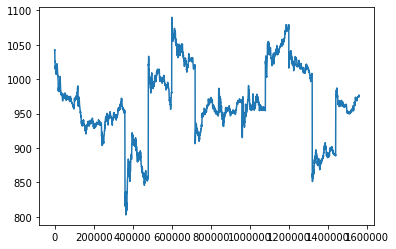

In [3]:
data[data.stock == 4000].close.plot()

In [4]:
# volume-weighted average price
data['vwap'] = data['tvr']/data['volume']
# 相较上个 tick 的 close return
data['return'] = data[['stock', 'close']].groupby('stock').transform(lambda x: abs2percB(x.values, 1))
# 预测目标：后十个 tick 的 close change
data['obj10'] = data[['stock', 'close']].groupby('stock').transform(lambda x: laggingF(abs2percF(x.values, 10), 1))
data

,tick,stock,open,high,low,close,volume,tvr,bid1_price,bid1_volume,...,ask7_volume,ask8_price,ask8_volume,ask9_price,ask9_volume,ask10_price,ask10_volume,vwap,return,obj10
0,0,4000,1042.660,1042.660,1032.380,1042.170,49862,5.165639e+07,1042.0722,233,...,0,1043.2470,0,1043.2470,0,1043.2470,0,1035.987111,NaN,-0.029094
1,0,4001,98.757,98.986,98.586,98.586,1882,1.862564e+05,98.4830,5648,...,20710,98.8720,18827,98.8948,193921,98.8948,0,98.967258,NaN,-0.000579
2,0,4002,67.521,67.596,66.660,66.660,29214,1.953638e+06,66.5178,14607,...,0,66.9220,0,66.9220,0,66.9220,0,66.873335,NaN,0.000568
3,0,4003,22.668,22.668,22.510,22.668,125336,2.828033e+06,22.6554,25770,...,93709,22.7946,0,22.7946,0,22.7946,0,22.563611,NaN,0.004150
4,0,4004,395.339,399.928,394.489,399.928,555456,2.206788e+08,399.8940,26003,...,18057,400.4380,67897,400.5058,16613,400.5738,5056,397.292984,NaN,-0.006736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559995,3119,4495,1448.533,1449.497,1448.533,1449.497,90586,1.312322e+08,1449.2080,9446,...,43353,1450.7494,1180,1450.9422,17206,1451.1348,168,1448.702986,0.000666,NaN
1559996,3119,4496,16.070,16.070,16.070,16.070,55148,8.855915e+05,16.0606,137870,...,623862,16.2106,930623,16.2294,144763,16.2294,0,16.058452,0.000000,NaN
1559997,3119,4497,510.302,511.160,510.302,510.817,39802,2.034112e+07,510.6796,20343,...,115870,511.2286,138868,511.2972,155673,511.3658,262699,511.057610,0.001009,NaN
1559998,3119,4498,107.099,107.252,107.022,107.099,85911,9.196869e+06,107.0836,7041,...,0,107.3904,0,107.3904,0,107.3904,0,107.051121,0.000000,NaN


In [5]:
# al = get_alpha(data[data['stock'] == 4000])
# al

In [6]:
# al.replace([np.inf, -np.inf], np.nan).dropna(thresh=len(al) - 26, axis=1)

In [7]:
# print(list(al.replace([np.inf, -np.inf], np.nan).dropna(thresh=len(al) - 26, axis=1).columns))

In [8]:
# # Use 52 of the 101 alphas bc others create too many nans

# def get_alpha52(df):
#     stock=Alphas(df)
#     t = time.time()
#     df['alpha001']=stock.alpha001()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha002']=stock.alpha002()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha003']=stock.alpha003()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha004']=stock.alpha004()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha006']=stock.alpha006()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha008']=stock.alpha008()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha009']=stock.alpha009()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha010']=stock.alpha010()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha012']=stock.alpha012()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha013']=stock.alpha013()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha014']=stock.alpha014()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha015']=stock.alpha015()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha016']=stock.alpha016()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha018']=stock.alpha018()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha020']=stock.alpha020()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha021']=stock.alpha021()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha023']=stock.alpha023()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha024']=stock.alpha024()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha026']=stock.alpha026()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha028']=stock.alpha028()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha030']=stock.alpha030()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha031']=stock.alpha031()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha033']=stock.alpha033()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha034']=stock.alpha034()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha038']=stock.alpha038()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha040']=stock.alpha040()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha041']=stock.alpha041()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha044']=stock.alpha044()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha046']=stock.alpha046()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha049']=stock.alpha049()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha051']=stock.alpha051()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha053']=stock.alpha053()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha054']=stock.alpha054()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha055']=stock.alpha055()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha061']=stock.alpha061()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha062']=stock.alpha062()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha064']=stock.alpha064()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha065']=stock.alpha065()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha068']=stock.alpha068()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha072']=stock.alpha072()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha073']=stock.alpha073()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha074']=stock.alpha074()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha075']=stock.alpha075()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha077']=stock.alpha077()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha081']=stock.alpha081()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha086']=stock.alpha086()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha088']=stock.alpha088()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha095']=stock.alpha095()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha096']=stock.alpha096()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha098']=stock.alpha098()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha099']=stock.alpha099()
#     print(df.columns[-1])
#     print(time.time() - t)
#     t = time.time()
#     df['alpha101']=stock.alpha101()  
#     print(df.columns[-1])
#     print(time.time() - t)
#     return df

In [9]:
# al52 = get_alpha52(data[data.stock == 4000])
# al52

In [10]:
# Remove too slow alphas
# 088, 096

In [11]:
# def get_alpha_fewer(df):
#         stock=Alphas(df)
#         df['alpha001']=stock.alpha001()
#         df['alpha002']=stock.alpha002()
#         df['alpha003']=stock.alpha003()
#         df['alpha004']=stock.alpha004()
#         df['alpha006']=stock.alpha006()
#         df['alpha008']=stock.alpha008()
#         df['alpha009']=stock.alpha009()
#         df['alpha010']=stock.alpha010()
#         df['alpha012']=stock.alpha012()
#         df['alpha013']=stock.alpha013()
#         df['alpha014']=stock.alpha014()
#         df['alpha015']=stock.alpha015()
#         df['alpha016']=stock.alpha016()
#         df['alpha018']=stock.alpha018()
#         df['alpha020']=stock.alpha020()
#         df['alpha021']=stock.alpha021()
#         df['alpha023']=stock.alpha023()
#         df['alpha024']=stock.alpha024()
#         df['alpha026']=stock.alpha026()
#         df['alpha028']=stock.alpha028()
#         df['alpha030']=stock.alpha030()
#         df['alpha031']=stock.alpha031()
#         df['alpha033']=stock.alpha033()
#         df['alpha034']=stock.alpha034()
#         df['alpha038']=stock.alpha038()
#         df['alpha040']=stock.alpha040()
#         df['alpha041']=stock.alpha041()
#         df['alpha044']=stock.alpha044()
#         df['alpha046']=stock.alpha046()
#         df['alpha049']=stock.alpha049()
#         df['alpha051']=stock.alpha051()
#         df['alpha053']=stock.alpha053()
#         df['alpha054']=stock.alpha054()
#         df['alpha055']=stock.alpha055()
#         df['alpha061']=stock.alpha061()
#         df['alpha062']=stock.alpha062()
#         df['alpha064']=stock.alpha064()
#         df['alpha065']=stock.alpha065()
#         df['alpha068']=stock.alpha068()
#         df['alpha072']=stock.alpha072()
#         df['alpha073']=stock.alpha073()
#         df['alpha074']=stock.alpha074()
#         df['alpha075']=stock.alpha075()
#         df['alpha077']=stock.alpha077()
#         df['alpha081']=stock.alpha081()
#         df['alpha086']=stock.alpha086()
#         df['alpha095']=stock.alpha095()
#         df['alpha098']=stock.alpha098()
#         df['alpha099']=stock.alpha099()
#         df['alpha101']=stock.alpha101()  
#         return df

In [12]:
# def get_alpha_all(df):
#     out = []
#     df_grouped = df.groupby('stock')
#     for group_name, df_group in df_grouped:
#         out.append(get_alpha_fewer(df_group))
#     return out

In [13]:
# output = pd.concat(get_alpha_all(data))

In [14]:
# output

In [15]:
# print(list(output.columns))

In [16]:
# output.loc[: ,'obj10':'alpha101'].corr()

In [17]:
# Remove other useless alphas
# 002, 009, 010, 031, 044, 046, 049, 051, 053, 054, 065, 068, 075, 086, 098
# 041

In [18]:
# 34 alphas

def get_alpha_final(df):
        stock=Alphas(df)
        df['alpha001']=stock.alpha001()
        df['alpha003']=stock.alpha003()
        df['alpha004']=stock.alpha004()
        df['alpha006']=stock.alpha006()
        df['alpha008']=stock.alpha008()
        df['alpha012']=stock.alpha012()
        df['alpha013']=stock.alpha013()
        df['alpha014']=stock.alpha014()
        df['alpha015']=stock.alpha015()
        df['alpha016']=stock.alpha016()
        df['alpha018']=stock.alpha018()
        df['alpha020']=stock.alpha020()
        df['alpha021']=stock.alpha021()
        df['alpha023']=stock.alpha023()
        df['alpha024']=stock.alpha024()
        df['alpha026']=stock.alpha026()
        df['alpha028']=stock.alpha028()
        df['alpha030']=stock.alpha030()
        df['alpha033']=stock.alpha033()
        df['alpha034']=stock.alpha034()
        df['alpha038']=stock.alpha038()
        df['alpha040']=stock.alpha040()
        df['alpha055']=stock.alpha055()
        df['alpha061']=stock.alpha061()
        df['alpha062']=stock.alpha062()
        df['alpha064']=stock.alpha064()
        df['alpha072']=stock.alpha072()
        df['alpha073']=stock.alpha073()
        df['alpha074']=stock.alpha074()
        df['alpha077']=stock.alpha077()
        df['alpha081']=stock.alpha081()
        df['alpha095']=stock.alpha095()
        df['alpha099']=stock.alpha099()
        df['alpha101']=stock.alpha101()  
        return df

In [19]:
def get_alpha_all(df):
    out = []
    df_grouped = df.groupby('stock')
    for group_name, df_group in df_grouped:
        out.append(get_alpha_final(df_group))
    return pd.concat(out)

In [20]:
output = get_alpha_all(data).sort_index()

In [21]:
output.to_csv('data/alphas34.csv')

In [22]:
# output

In [23]:
# output.sort_index().loc[: ,'obj10':'alpha101'].corr()